# House holding price prediction

aim predict the sale price of a house

Features 80

MSSubClass,
MSZoning,
LotFrontage,
LotArea,
Street,
Alley,
LotShape,
LandContour,
Utilities,
LotConfig,
LandSlope,
Neighborhood,
Condition1,
Condition2,
BldgType,
HouseStyle,
OverallQual,
OverallCond,
YearBuilt,
YearRemodAdd,
RoofStyle,
RoofMatl,
Exterior1st,
Exterior2nd,
MasVnrType,
MasVnrArea,
ExterQual,
ExterCond,
Foundation,
BsmtQual,
BsmtCond,
BsmtExposure,
BsmtFinType1,
BsmtFinSF1,
BsmtFinType2,
BsmtFinSF2,
BsmtUnfSF,
TotalBsmtSF,
Heating,
HeatingQC,
CentralAir,
Electrical,
1stFlrSF,
2ndFlrSF,
LowQualFinSF,
GrLivArea,
BsmtFullBath,
BsmtHalfBath,
FullBath,
HalfBath,
Bedroom,
Kitchen,
KitchenQual,
TotRmsAbvGrd,
Functional,
Fireplaces,
FireplaceQu,
GarageType,
GarageYrBlt,
GarageFinish,
GarageCars,
GarageArea,
GarageQual,
GarageCond,
PavedDrive,
WoodDeckSF,
OpenPorchSF,
EnclosedPorch,
3SsnPorch,
ScreenPorch,
PoolArea,
PoolQC,
Fence,
MiscFeature,
MiscVal,
MoSold,
YrSold,
SaleType,
SaleCondition

#### Kaggle dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# ------------------------------------------Importing libraries------------------------------------------

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ------------------------------------------Getting dataset------------------------------------------

In [303]:
# load dataset
data = pd.read_csv('train.csv')
data = pd.get_dummies(data)
x = data.drop(['SalePrice'], axis = 1)
y = data['SalePrice']

data2 = pd.read_csv('test.csv')

**------------------------------------------------------------------------Looking into dataset--------------------------------------------------------------------**

# ------------------------------------------number of columns & rows------------------------------------------

In [304]:
# check shape
print(data.shape)
print(data2.shape)

(1460, 290)
(1459, 80)


In [305]:
data.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


In [306]:
data2.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


# ------------------------------------------Spliting the data in 80/20 ratio------------------------------------------

In [307]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [308]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 289)
(292, 289)
(1168,)
(292,)


**------------------------------------------Number of columns in train data is 289------------------------------------------**

**------------------------------------------Number of rows in train data is 1168------------------------------------------**

**------------------------------------------Number of columns in test data is 289------------------------------------------**

**------------------------------------------Number of crows in train data is 292------------------------------------------**

In [309]:
train_data = x_train.join(y_train)
print(train_data.shape)
test_data = x_test.join(y_test)
print(test_data.shape)

(1168, 290)
(292, 290)


In [310]:
# plt.rcParams["figure.figsize"] = [20, 8]
# plt.rcParams["figure.autolayout"] = True
# train_data.hist()

# ------------------------------------------The actual values of house price------------------------------------------

In [311]:
print(data['SalePrice'].head(10))

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64


In [312]:
# sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')

In [313]:
from sklearn.linear_model import LinearRegression

x_train = x_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')
x_train = x_train.fillna("0")
y_train = y_train.fillna("0")

x_test = x_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')
x_test = x_test.fillna("0")
y_test = y_test.fillna("0")

In [314]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [315]:
print(train_data.shape)
print(test_data.shape)

(1168, 290)
(292, 290)


# Visualizing the set results

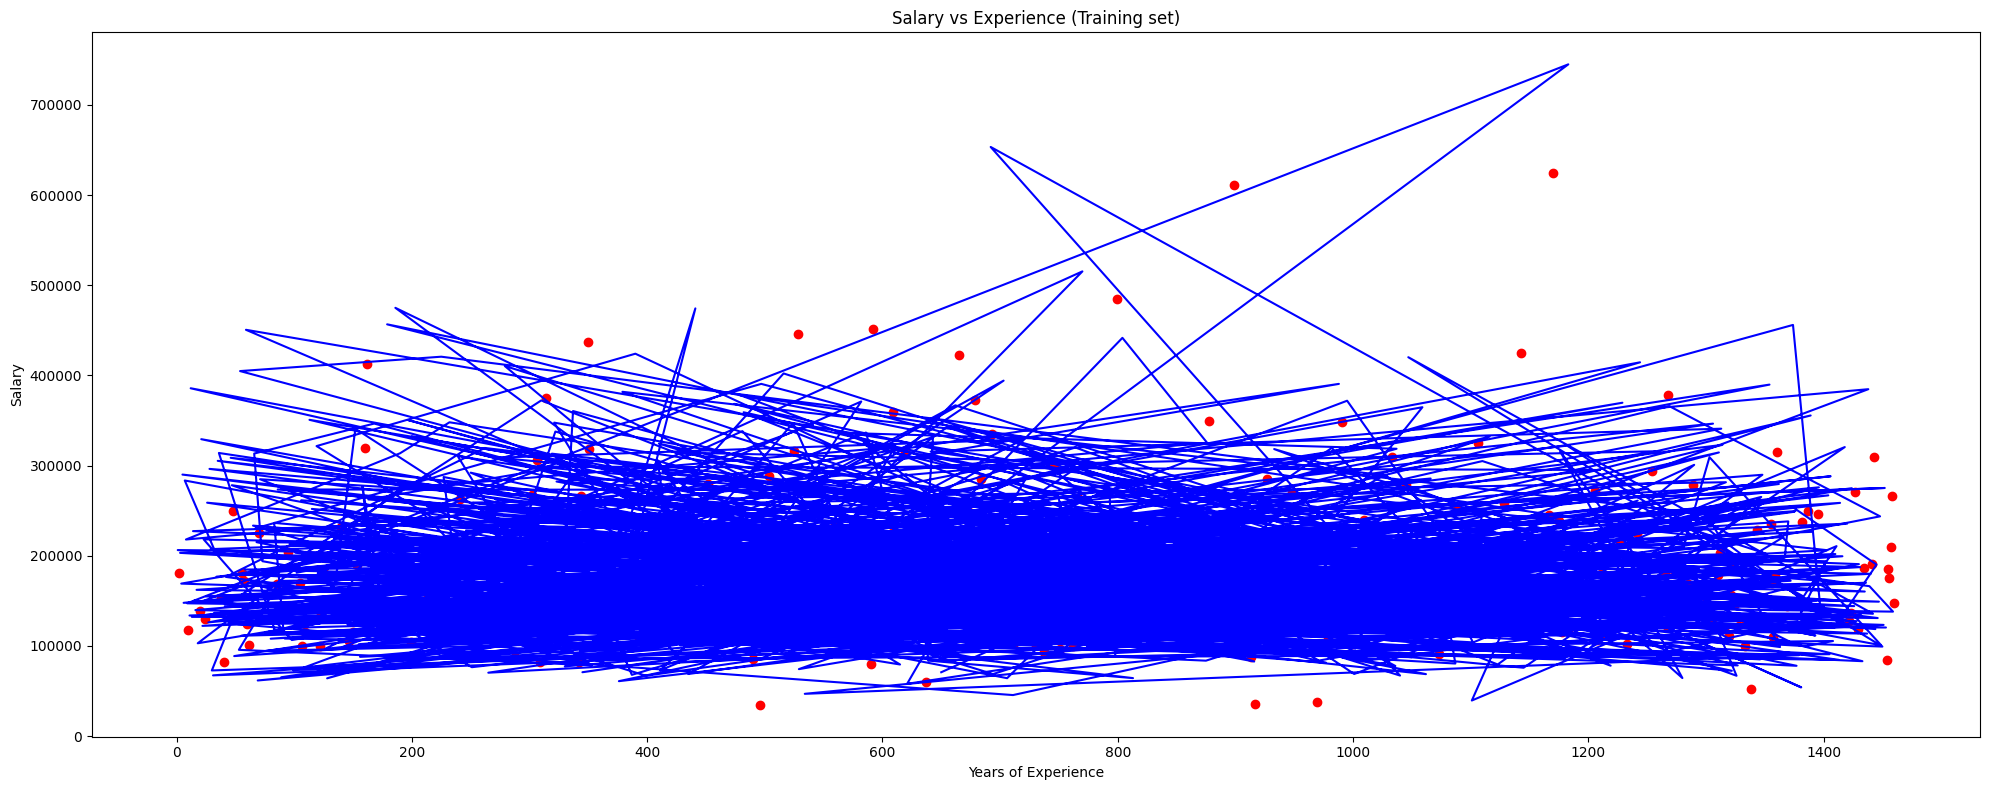

In [316]:
plt.scatter(x_test['Id'], y_test, color = 'red')
plt.plot(x_train['Id'], reg.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# ---------------------------------------Test Data--------------------------------------

In [317]:
submit = pd.DataFrame()
submit['predicted values'] = reg.predict(x_train)
submit['real values'] = y_train
submit.to_csv('submission', index = True)

In [318]:
submit

,predicted values,real values
0,70894.927968,208500.0
1,142191.406805,NaN
2,151277.499946,223500.0
3,410486.982845,140000.0
4,178196.420418,250000.0
...,...,...
1163,160671.448513,108959.0
1164,120247.520693,194000.0
1165,515429.263980,233170.0
1166,146723.961681,NaN


<Axes: >

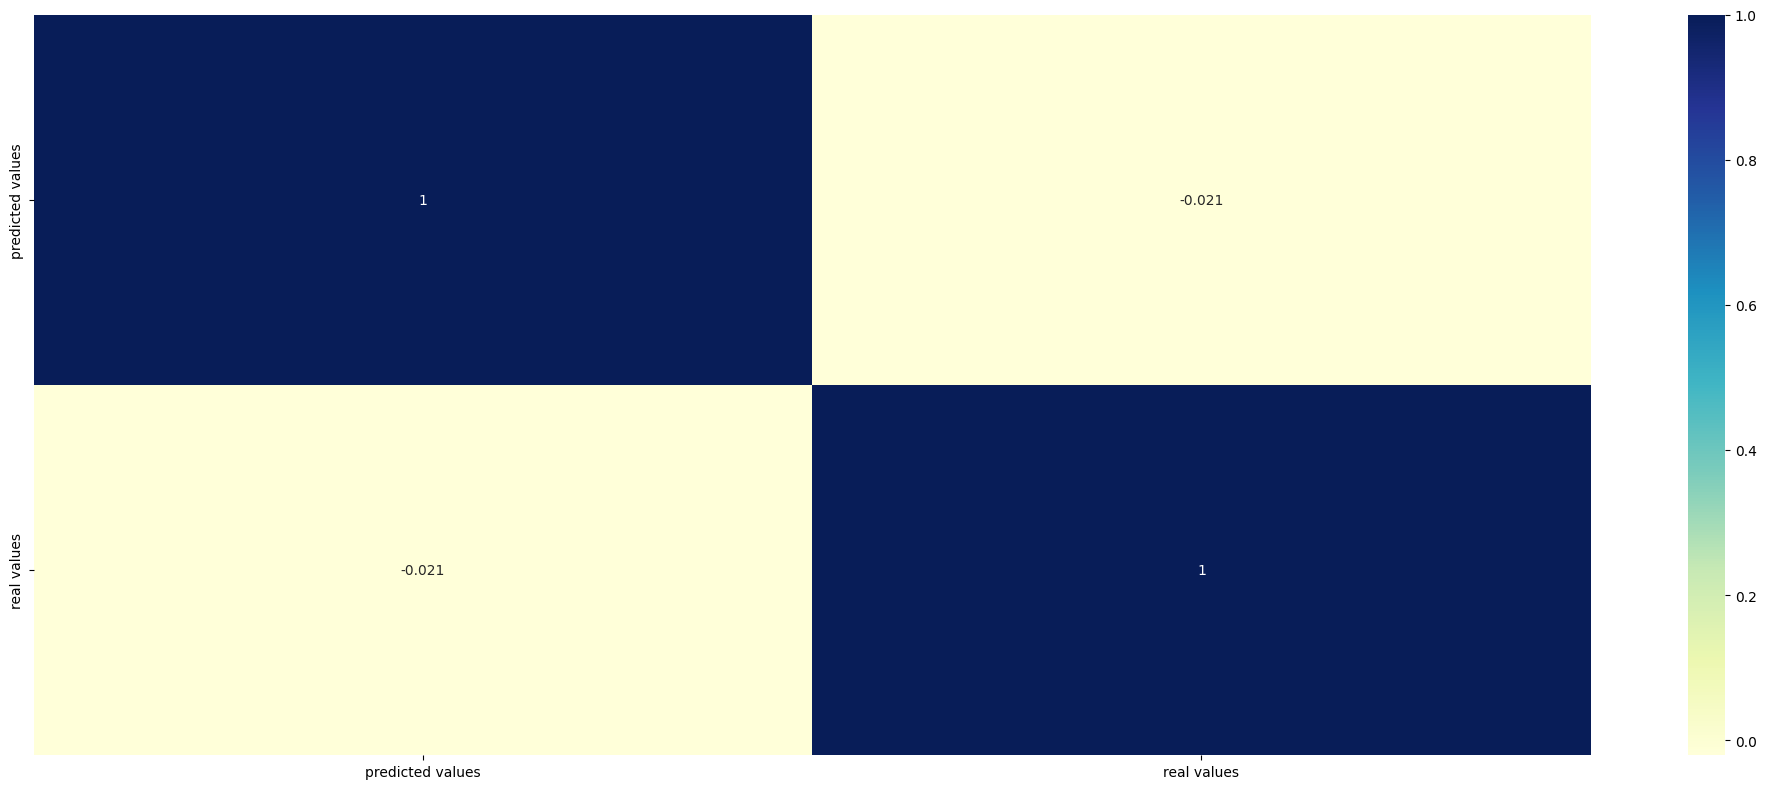

In [319]:
sns.heatmap(submit.corr(), annot = True, cmap = 'YlGnBu')

<Axes: xlabel='Id', ylabel='SalePrice'>

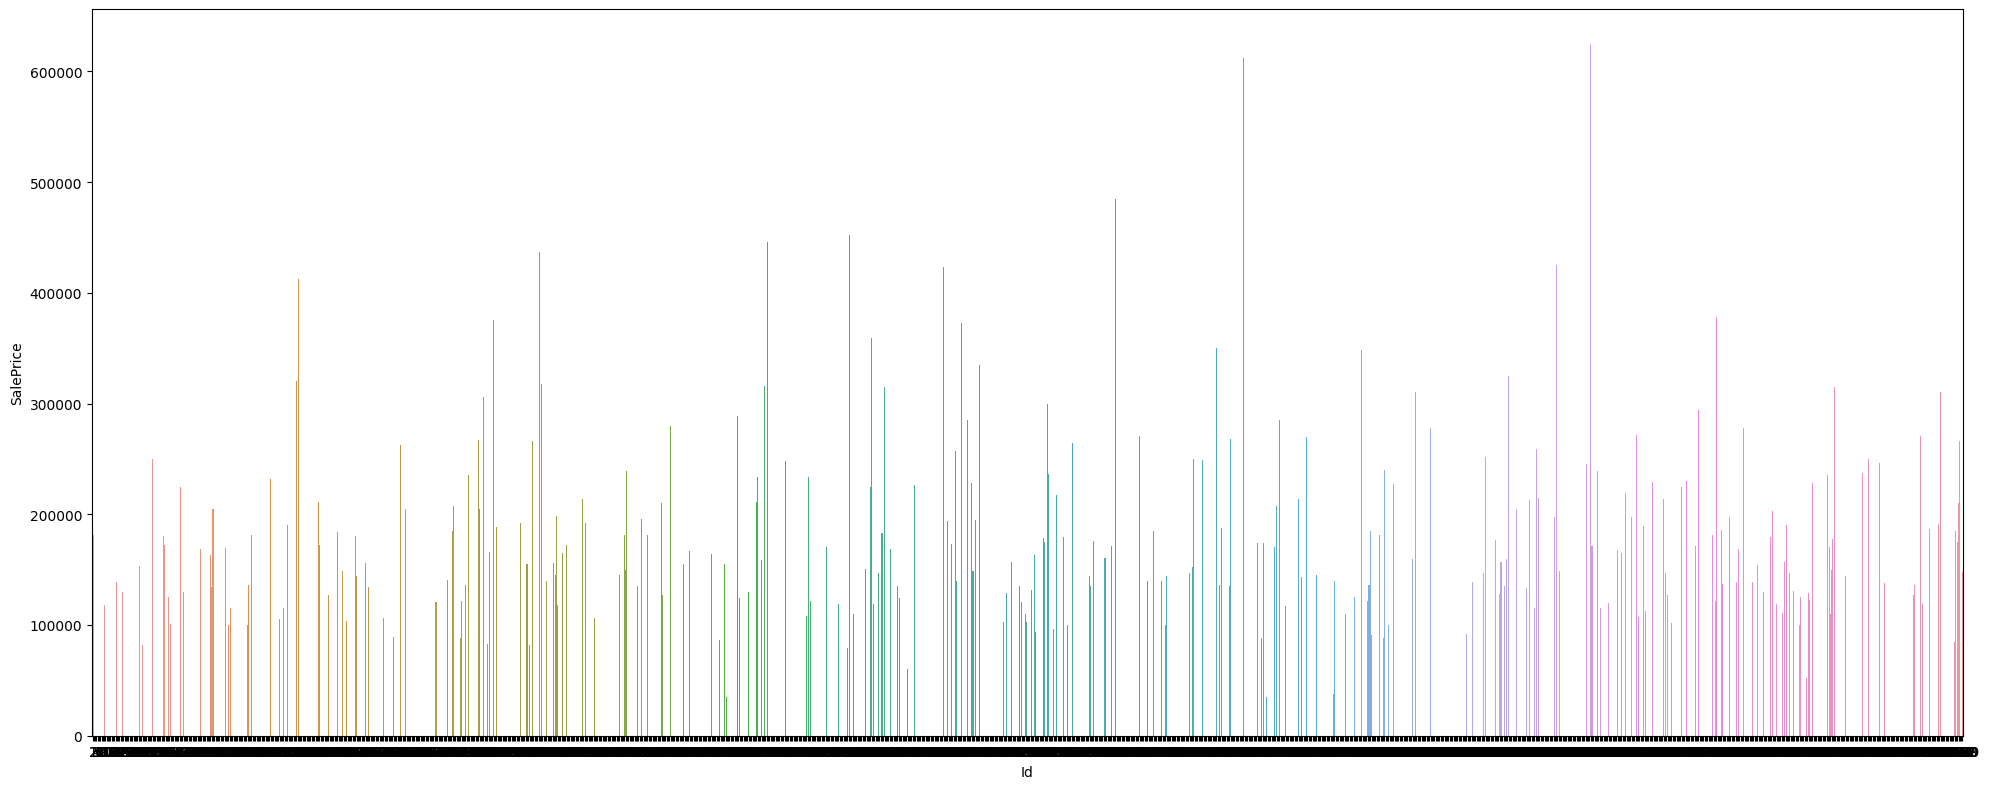

In [320]:
sns.barplot(x = data['Id'], y = y_test)